In [1]:
## Importing necssary libraries


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
## Loading the dataset

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In [6]:
## Basic understanding of the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [8]:
## We basically have 5 numerical features and 11 categorical values

In [9]:
print("Total no. of entries: ", df.shape[0])
print("Total no. of features: ", df.shape[1])

Total no. of entries:  32950
Total no. of features:  16


In [10]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [11]:
df.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [12]:
df.nunique()

age              75
job              12
marital           4
education         8
default           3
housing           3
loan              3
contact           2
month            10
day_of_week       5
duration       1467
campaign         40
pdays            27
previous          8
poutcome          3
y                 2
dtype: int64

In [13]:
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [14]:
df.duplicated().sum()

8

In [15]:
## Seeing the dublicate rows

In [16]:
dub = df[df.duplicated(keep=False)]

In [17]:
dub

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
1577,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,no
1923,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,no
5861,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,no
6257,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,no
6306,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,no
6807,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,no
12252,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,no
18172,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,no
20067,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,no
20839,71,retired,single,university.degree,no,no,no,telephone,oct,tue,120,1,999,0,nonexistent,no


In [18]:
## Data pre-proccesing 

In [19]:
## Droping the dublicates

In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df.duplicated().sum()

0

In [22]:
## Renaming the targeted value


In [23]:
df.rename(columns={'y': 'Deposit'}, inplace=True)

In [24]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,Deposit
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [25]:
## Exploratory Data Analysis

In [26]:
## Checking for imbalance

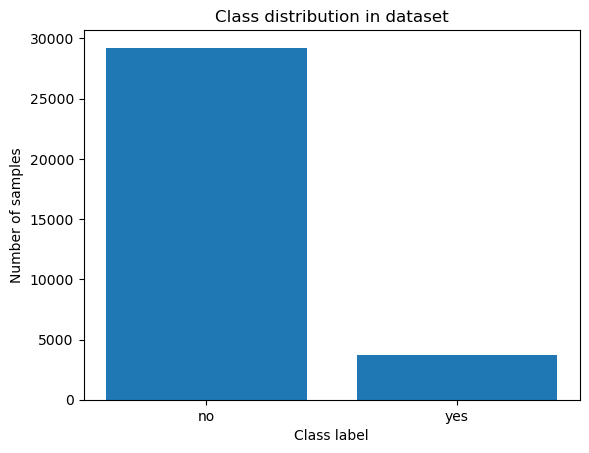

In [27]:
unique_labels, counts = np.unique(df['Deposit'], return_counts=True)

plt.bar(unique_labels, counts)
plt.xlabel('Class label')
plt.ylabel('Number of samples')
plt.title('Class distribution in dataset')
plt.show()

In [28]:
## yes, This dataset is highly imbalanced so to overcome this problem we have to do some sampling technique

In [29]:
cat_cols = df.select_dtypes(include="object").columns.to_list()
cat_cols.remove('Deposit')

In [30]:
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

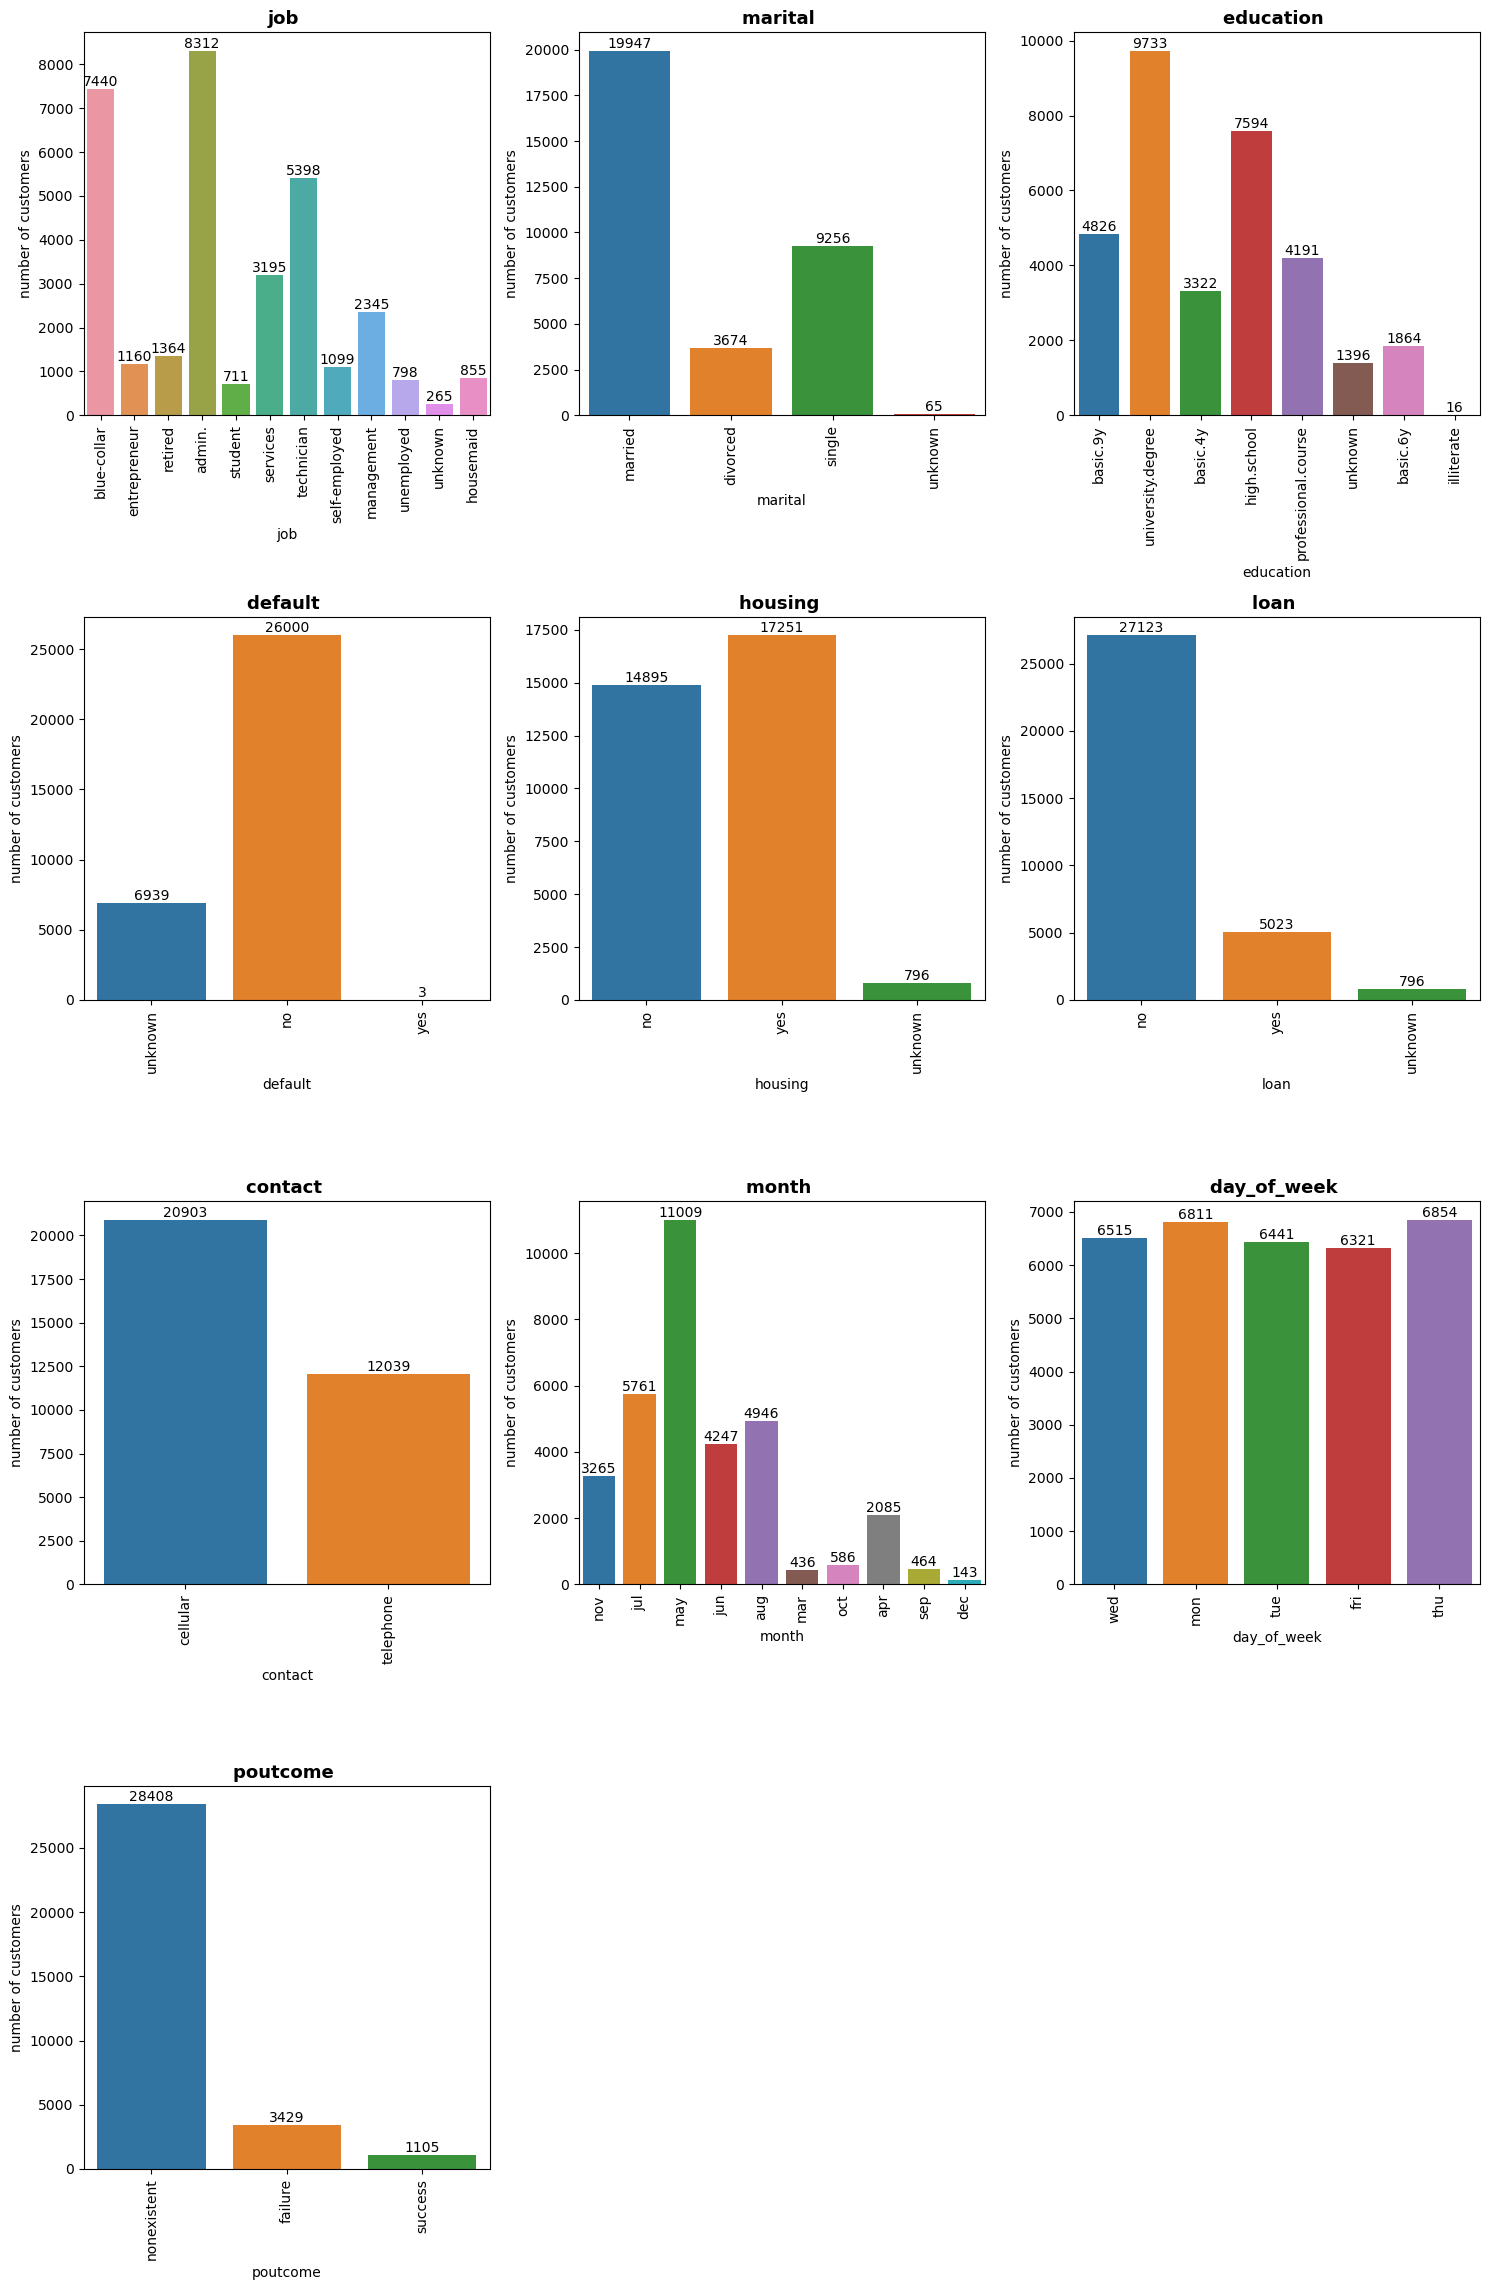

In [31]:
plt.figure(figsize=(15,23))
for i, cols in enumerate(cat_cols):
   plt.subplot(4 ,3, i+1)
   ax= sns.countplot(df, x=cols)
   for bars in ax.containers:
      ax.bar_label(bars)
   plt.title(f"{cols} ",fontsize=13, fontweight="black")
   plt.xticks(rotation=90)
   plt.ylabel("number of customers")

plt.tight_layout()
plt.show()

In [32]:
## What we have found

## We have found that the top profession that our customers belong is administration, the second highest job that customers do is blue-collar after this the technicians jobs come.
## The marital feature shows most of the customers are married.
## Majority customers are university degree holders and very only few are iliterate.
## Majority of the customers do not have a credit in default.
## Most of the customers have applied for a housing loan but very few have applied for personal loans.
## Cell-phones seem to be the most favoured method of reaching out to customers.
## In the month of May, many customers have been contacted.
## Previous marketing campaign outcome success rate is very low.

In [33]:
num_cols = df.select_dtypes(include="number").columns.to_list()
num_cols

['age', 'duration', 'campaign', 'pdays', 'previous']

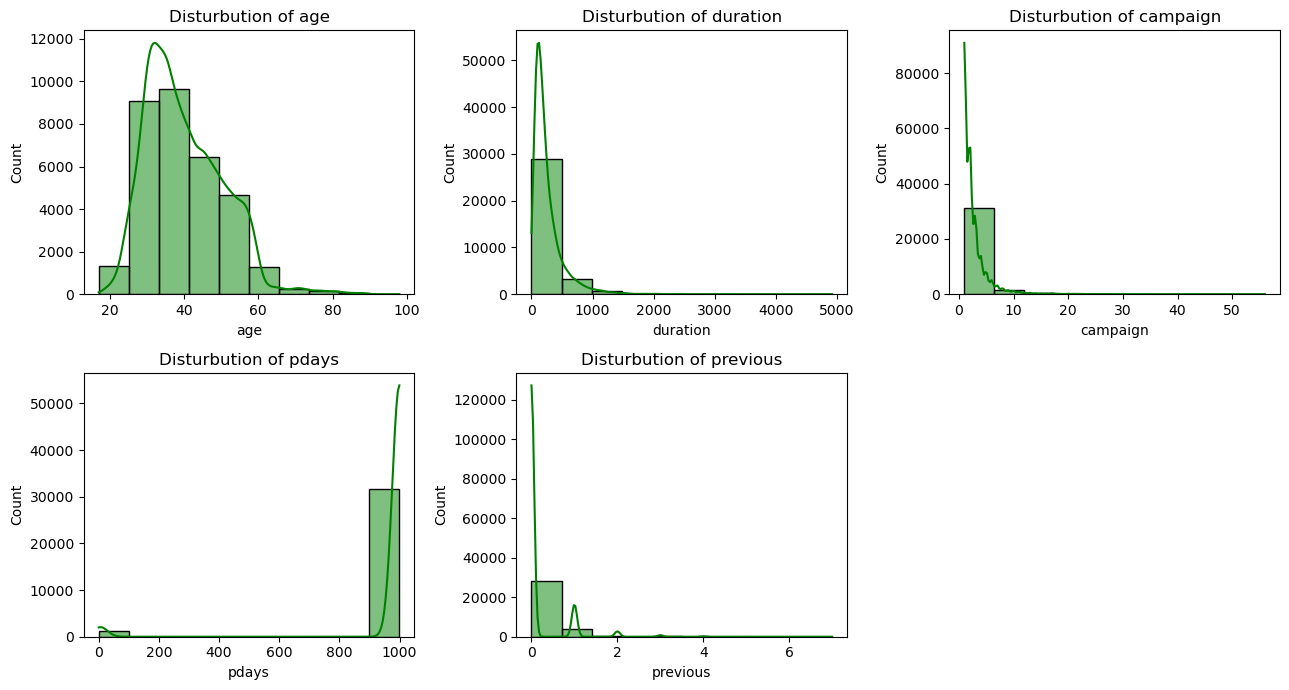

In [34]:
plt.figure(figsize=(13,7))
for i, cols in enumerate(num_cols):
  plt.subplot(2, 3, i+1)
  sns.histplot(df, x=cols, kde=True, bins=10, color="green")
  plt.title(f"Disturbution of {cols}")
plt.tight_layout()
plt.show()

In [35]:
## From the distplot of Age feature, we can observe that most of custmoers are above 20 and below 40.
## All the other plots are heavily skewed.

In [36]:
## Studying the relationships between features


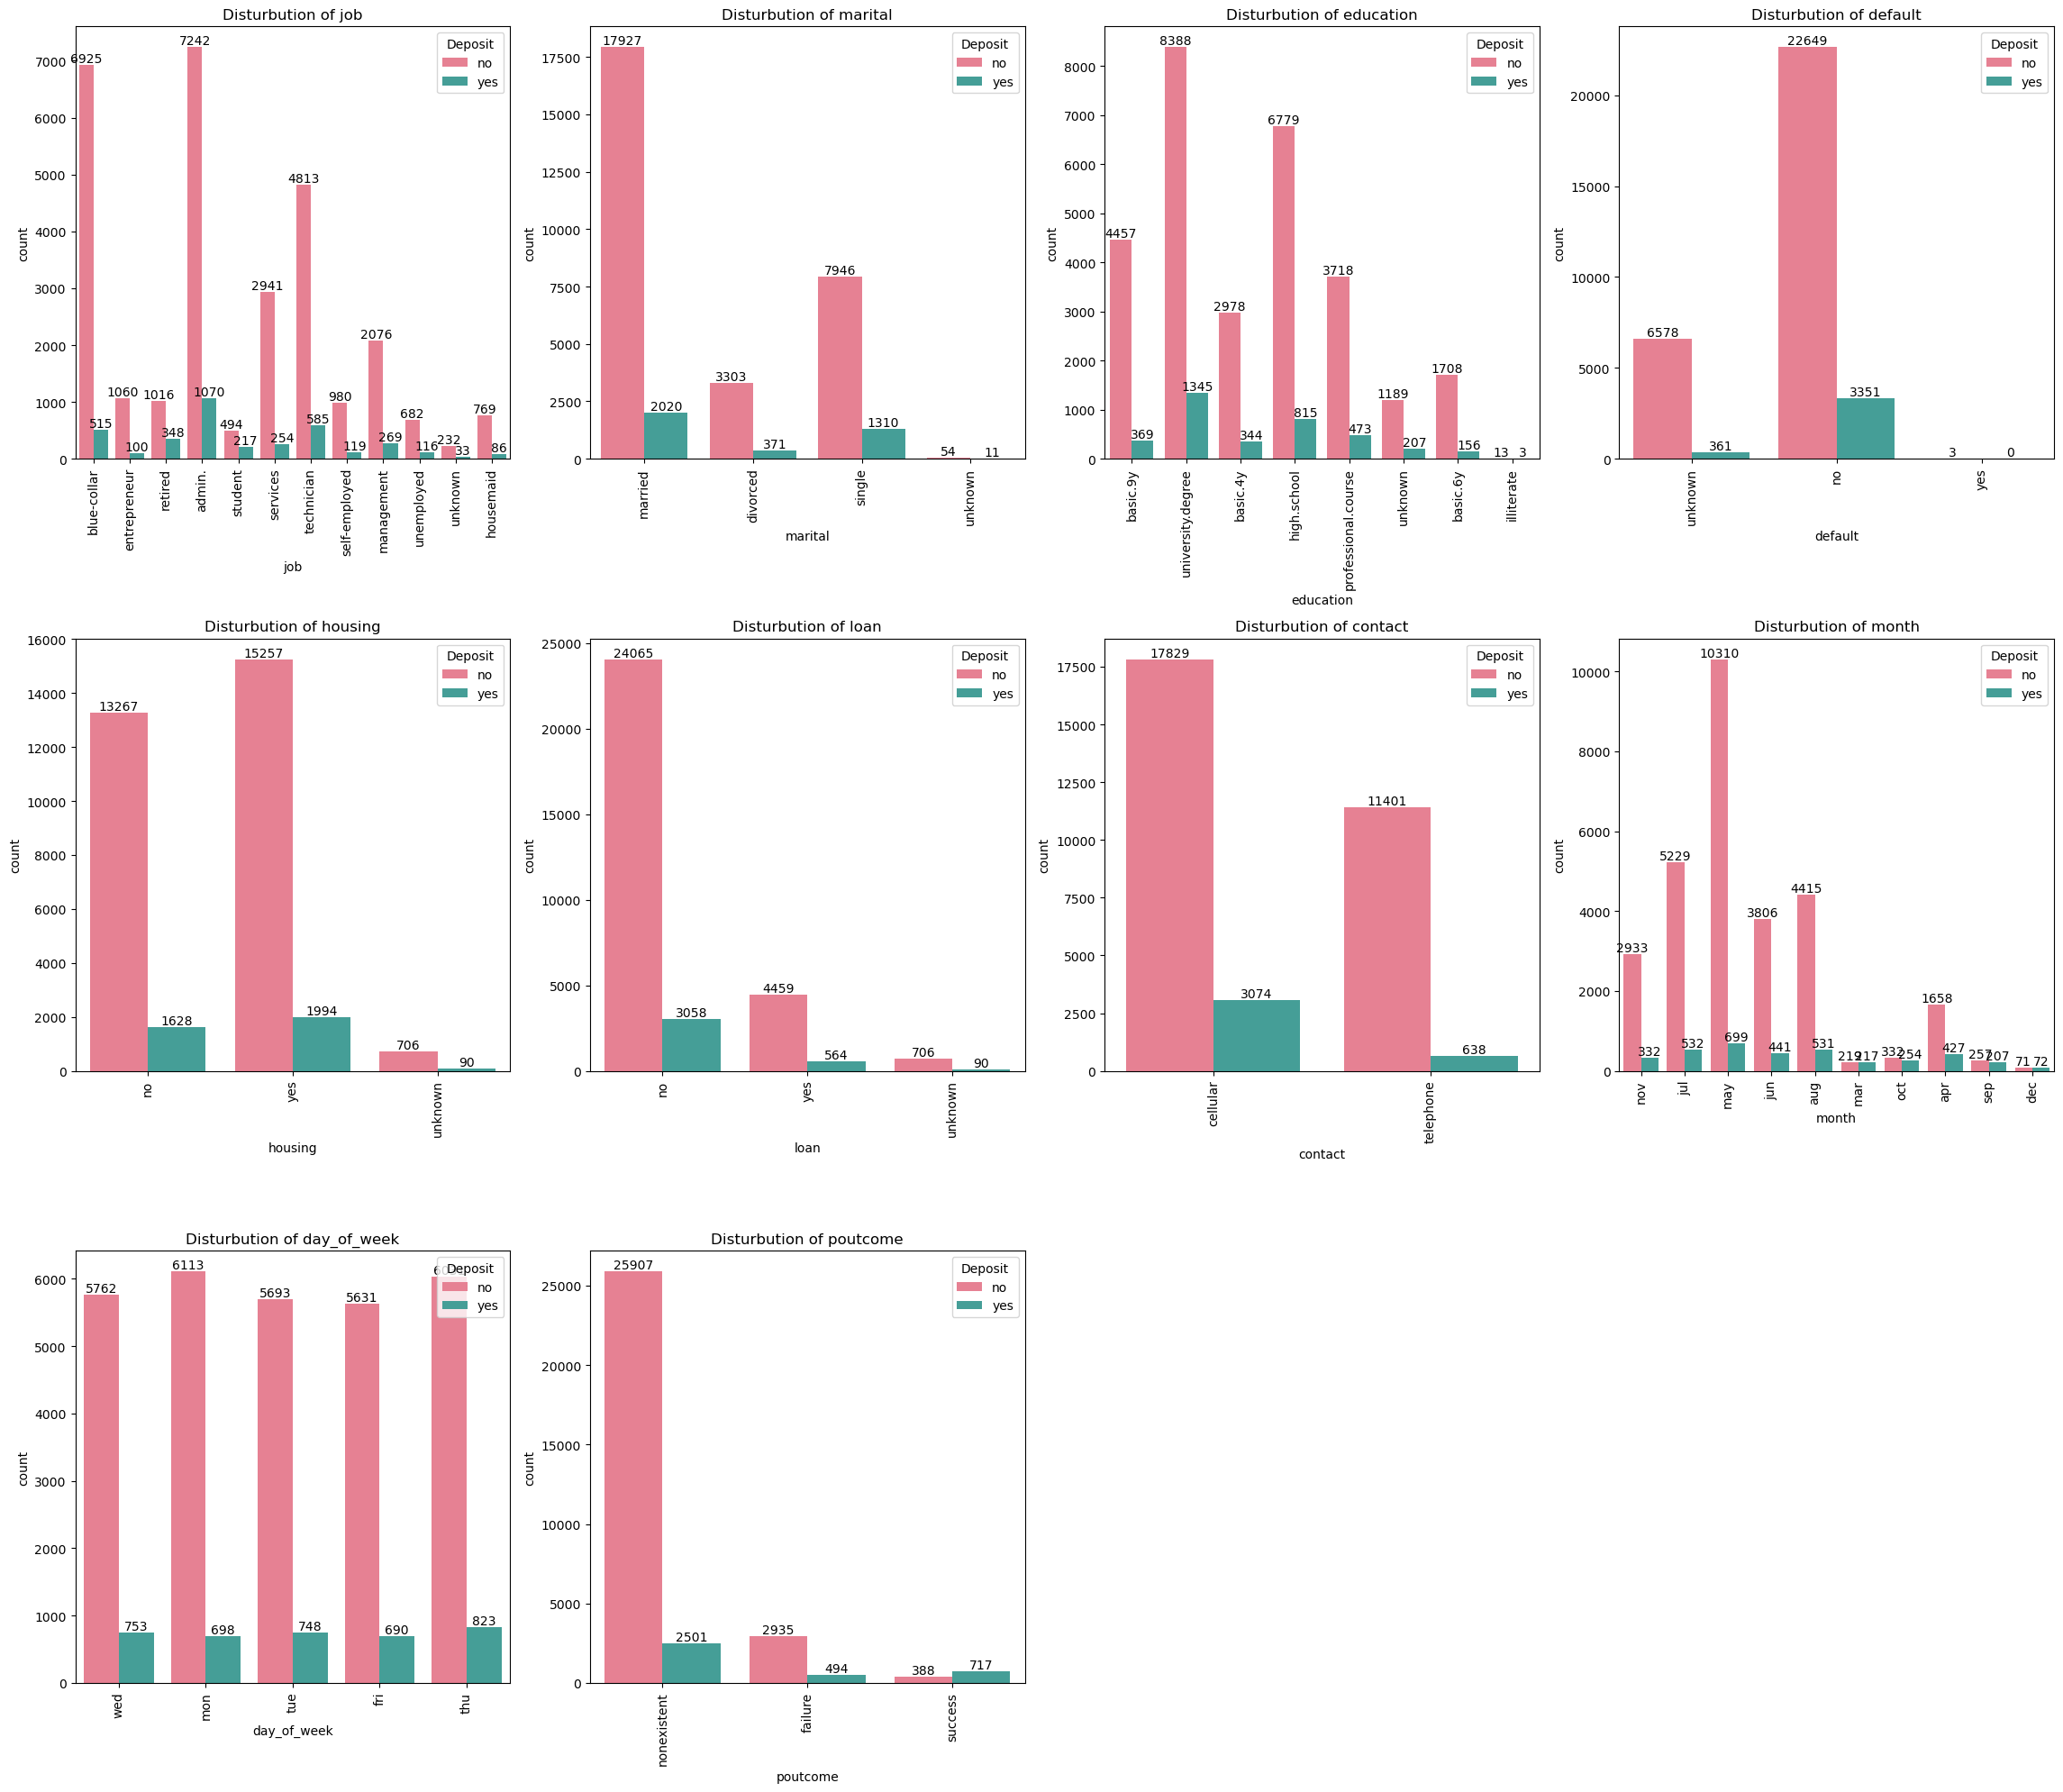

In [37]:
plt.figure(figsize=(23,20))
for i, cols in enumerate(cat_cols):
  plt.subplot(3 ,4, i+1)
  ax=sns.countplot(df, x=cols, hue="Deposit", palette="husl")
  for bars in ax.containers:
    ax.bar_label(bars)
  plt.title(f"Disturbution of {cols}")
  plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [38]:
## Observations

## Amongst those customers who have subscirbed to the term deposit, are having administrative jobs.
## Marital status is that they are married.
## They hold a university degree
## They do not hold a credit in default.
## Housing loan doesn't seem a priority to check for since an equal number of customers who have and have not subscribed to it seem to have subscribed to the term deposit.
## Cell-phones should be the preferred mode of contact for contacting customers.

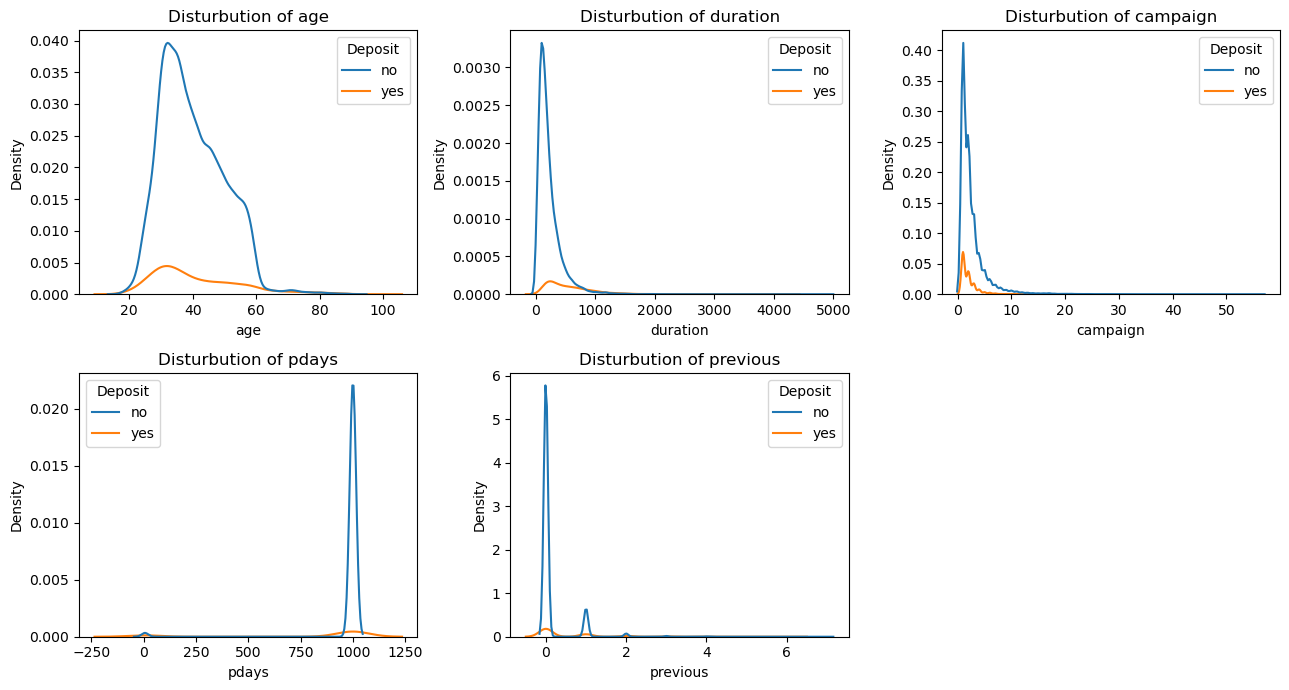

In [39]:
plt.figure(figsize=(13,7))
for i, cols in enumerate(num_cols):
  plt.subplot(2, 3, i+1)
  sns.kdeplot(df, x=cols, hue="Deposit", color="green")
  plt.title(f"Disturbution of {cols}")
plt.tight_layout()
plt.show()

In [40]:
## i didnt figure out any relationship because these features are very skewed

In [41]:
#create the object for LabelEncoder class

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["Deposit"] = le.fit_transform(df["Deposit"])

In [42]:
df['Deposit']

0        0
1        0
2        1
3        0
4        0
        ..
32945    0
32946    0
32947    0
32948    0
32949    0
Name: Deposit, Length: 32942, dtype: int32

In [43]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,Deposit
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,0
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,0
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,1
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,0
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,0


In [44]:
num_col = df.select_dtypes(include="number").columns.to_list()

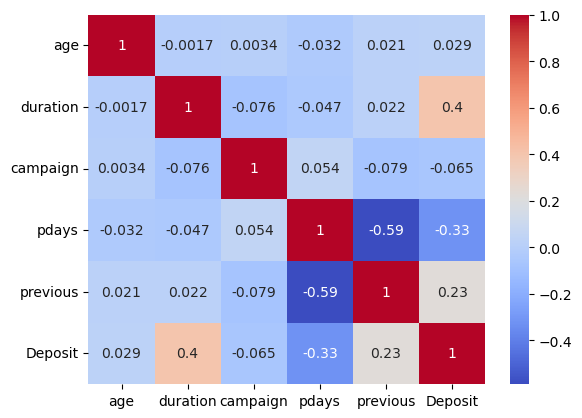

In [45]:
corr = df[num_col].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

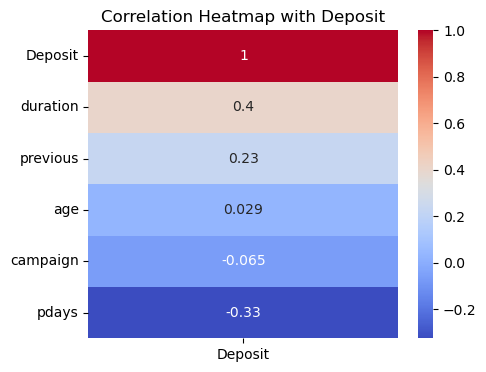

In [46]:
plt.figure(figsize=(5, 4))
corr = df[num_col].corr()['Deposit'].to_frame().sort_values(by='Deposit', ascending=False)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap with Deposit")
plt.show()

In [47]:
## Observation

## The duration is moderately correlated with term deposit.
## age have a very weak positive and capaign have a a very weak negative coorealtion with the term deposit.
## pdays have a moderately negatie correalted with the target feature term deposit.

In [48]:
## Encoding other categorical values

In [49]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df[cat_cols] = df[cat_cols].apply(lambda col: label_encoder.fit_transform(col))

# Now, all categorical columns are replaced with encoded numerical values


In [50]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,Deposit
0,49,1,1,2,1,0,0,0,7,4,227,4,999,0,1,0
1,37,2,1,6,0,0,0,1,7,4,202,2,999,1,0,0
2,78,5,1,0,0,0,0,0,3,1,1148,1,999,0,1,1
3,36,0,1,6,0,2,0,1,6,1,120,2,999,0,1,0
4,59,5,0,6,0,0,0,0,4,3,368,2,999,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,7,2,3,0,2,0,0,3,3,192,1,999,0,1,0
32946,52,9,1,5,0,2,0,0,7,0,64,1,999,1,0,0
32947,54,0,1,2,0,0,2,0,3,1,131,4,999,0,1,0
32948,29,0,1,6,0,0,0,1,6,0,165,1,999,0,1,0


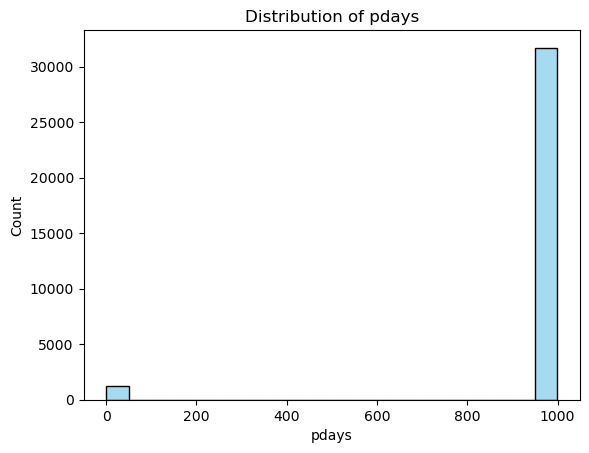

In [51]:
sns.histplot(df['pdays'], bins=20, kde=False, color='skyblue')
plt.title('Distribution of pdays')
plt.xlabel('pdays')
plt.ylabel('Count')
plt.show()

In [52]:
sel = df[df['pdays'] < 200]


In [53]:
sel

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,Deposit
19,34,0,2,6,0,0,2,0,5,3,288,2,3,1,2,1
24,55,10,0,6,0,0,0,0,5,3,212,3,6,3,2,1
88,77,5,1,0,0,1,1,0,3,3,218,2,3,1,2,1
127,36,0,1,3,1,2,2,0,6,1,264,1,10,1,2,0
146,34,0,1,6,0,2,0,0,6,0,407,3,8,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32732,30,8,2,7,0,2,0,0,5,3,136,1,9,1,2,1
32786,56,5,1,5,0,0,0,0,8,2,133,1,3,1,2,1
32844,60,5,1,3,0,0,0,0,1,3,123,1,4,1,2,0
32863,31,10,2,5,0,2,0,0,7,4,192,1,0,1,2,0


In [54]:
## Seperating dependent and indeependet features

In [74]:
x = df.drop("Deposit", axis=1)
y = df["Deposit"]

In [75]:
## Heandling the unbalanced dataset using SMOTE

In [76]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [77]:
from imblearn.over_sampling import SMOTE

In [78]:
smote = SMOTE(sampling_strategy = 'minority')
x_sm, y_sm = smote.fit_resample(x,y)

In [79]:
y_sm.value_counts()

Deposit
0    29230
1    29230
Name: count, dtype: int64

In [81]:
x = x_sm

In [82]:
y = y_sm

In [83]:
x.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,49,1,1,2,1,0,0,0,7,4,227,4,999,0,1
1,37,2,1,6,0,0,0,1,7,4,202,2,999,1,0
2,78,5,1,0,0,0,0,0,3,1,1148,1,999,0,1
3,36,0,1,6,0,2,0,1,6,1,120,2,999,0,1
4,59,5,0,6,0,0,0,0,4,3,368,2,999,0,1


In [84]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Deposit, dtype: int32

In [85]:
y.value_counts()

Deposit
0    29230
1    29230
Name: count, dtype: int64

In [90]:
x.shape

(58460, 15)

In [ ]:
## Scailing the data

In [92]:
from sklearn.preprocessing import StandardScaler

In [96]:
from sklearn.preprocessing import StandardScaler

feature = x.columns

scaler = StandardScaler()
x[feature] = scaler.fit_transform(x[feature])


In [98]:
x.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,0.774447,-0.764405,-0.189646,-0.876557,2.633308,-1.041124,-0.421631,-0.538089,1.274801,1.640804,-0.445607,0.813921,0.35735,-0.419515,0.110974
1,-0.262273,-0.476984,-0.189646,1.102473,-0.379397,-1.041124,-0.421631,1.858428,1.274801,1.640804,-0.515864,-0.075550,0.35735,1.295269,-1.894454
2,3.279853,0.385280,-0.189646,-1.866072,-0.379397,-1.041124,-0.421631,-0.538089,-0.441087,-0.657118,2.142661,-0.520286,0.35735,-0.419515,0.110974
3,-0.348666,-1.051827,-0.189646,1.102473,-0.379397,1.100169,-0.421631,1.858428,0.845829,-0.657118,-0.746307,-0.075550,0.35735,-0.419515,0.110974
4,1.638380,0.385280,-1.839209,1.102473,-0.379397,-1.041124,-0.421631,-0.538089,-0.012115,0.874830,-0.049358,-0.075550,0.35735,-0.419515,0.110974


In [99]:
y.value_counts()

Deposit
0    29230
1    29230
Name: count, dtype: int64

In [87]:
## Now we split data in train and test and create the model

In [101]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x ,y ,test_size=0.2)

In [102]:
from sklearn.tree import DecisionTreeClassifier

In [104]:
dtree = DecisionTreeClassifier(max_depth=8, splitter='random')


dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, splitter='random')

In [106]:
from sklearn.metrics import accuracy_score
y_train_pred = dtree.predict(x_train)
print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(y_train,y_train_pred)*100,2),"%")

Accuracy Score of Model on Training Data is => 83.7 %


In [108]:
from sklearn.metrics import classification_report
y_test_pred = dtree.predict(x_test)
print(classification_report(y_test,y_test_pred))
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,y_test_pred)*100,2),"%")

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      5841
           1       0.78      0.92      0.84      5851

    accuracy                           0.83     11692
   macro avg       0.84      0.83      0.83     11692
weighted avg       0.84      0.83      0.83     11692

Accuracy Score of Model on Testing Data  is => 82.78 %
